In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
arma_file="./data/arma2.jpg"
kit1_file="./data/kit1.jpg"

img1 = cv.imread(arma_file,cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(kit1_file,cv.IMREAD_GRAYSCALE) # trainImage

In [2]:
sift = cv.xfeatures2d.SIFT_create()
surf = cv.xfeatures2d.SURF_create()
orb = cv.ORB_create(nfeatures=1500)

In [3]:
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(img1, None)
keypoints_surf_1, descriptors_surf_1 = surf.detectAndCompute(img1, None)
keypoints_orb_1, descriptors_orb_1 = orb.detectAndCompute(img1, None)

In [4]:
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(img2, None)
keypoints_surf_2, descriptors_surf_2 = surf.detectAndCompute(img2, None)
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(img2, None)

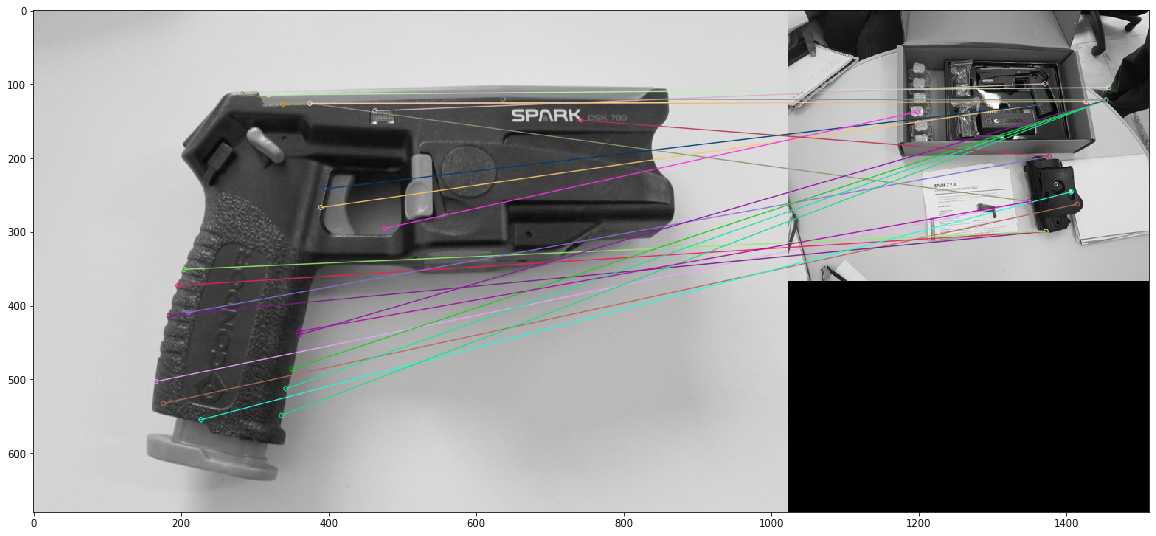

(<matplotlib.image.AxesImage at 0x1c240fb5518>, None)

In [5]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_sift_1,descriptors_sift_2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,keypoints_sift_1,img2,keypoints_sift_2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,15))
plt.imshow(img3),plt.show()

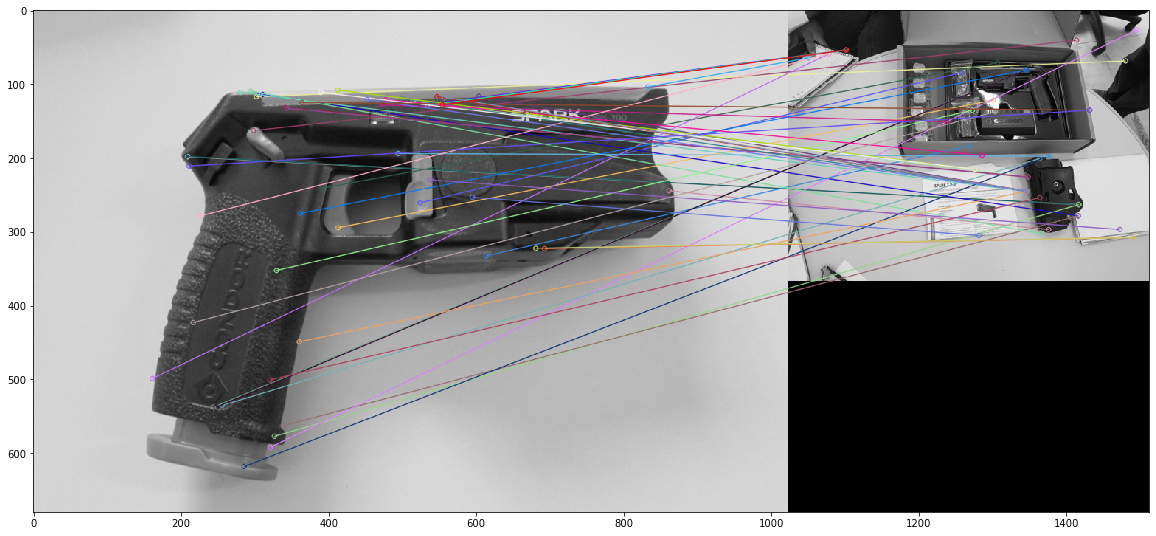

(<matplotlib.image.AxesImage at 0x1c2413a0a20>, None)

In [6]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_surf_1,descriptors_surf_2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,keypoints_surf_1,img2,keypoints_surf_2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,15))
plt.imshow(img3),plt.show()

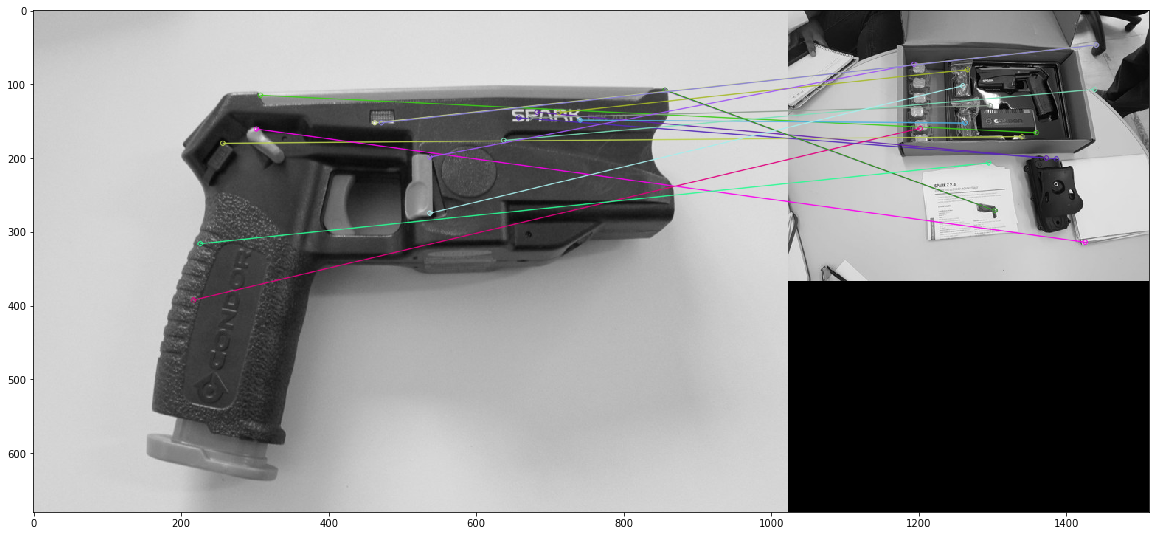

(<matplotlib.image.AxesImage at 0x1c241c6b240>, None)

In [7]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_orb_1,descriptors_orb_2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,keypoints_orb_1,img2,keypoints_orb_2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,15))
plt.imshow(img3),plt.show()

In [43]:
def detect_sift(original):
    sift = cv2.xfeatures2d.SIFT_create()
    kp_1, desc_1 = sift.detectAndCompute(original, None)
    return kp_1, desc_1

def match(desc_1,desc_2):
    index_params = dict(algorithm=0, trees=5)
    search_params = dict()
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(desc_1, desc_2, k=2)
    good_points = []
    ratio = 0.6
    for m, n in matches:
        if m.distance < ratio*n.distance:
            good_points.append(m)
    return len(good_points)

In [52]:
path_name=os.getcwd()+os.sep+"data"+os.sep
lista_objetos= dict()
img=cv2.imread(path_name+"arma.jpg")
lista_objetos['arma']=detect_sift(img)
img=cv2.imread(path_name+"bateria.jpg")
lista_objetos['bateria']=detect_sift(img)
img=cv2.imread(path_name+"fonte.jpg")
lista_objetos['fonte']=detect_sift(img)
img=cv2.imread(path_name+"tomada.jpg")
lista_objetos['tomada']=detect_sift(img)
for objeto in lista_objetos:
    print(objeto,len(lista_objetos[objeto][0]))
print(match(lista_objetos['arma'][1],lista_objetos['tomada'][1]))


arma 84
bateria 23
fonte 41
tomada 50
0


In [53]:
import os,cv2
from os.path import dirname

for num_frames_std in range(1,50):
    file_name='{}{}seg{}{}{}'.format(path_name, os.sep, os.sep, num_frames_std, '.png')
    img=cv2.imread(file_name)
    kp_1,desc_1=detect_sift(img)
    print(file_name,img.shape,len(kp_1))
    for objeto in lista_objetos:
        print(objeto,match(desc_1,lista_objetos[objeto][1]))

D:\desenvolvimento\github\python-computer-vision\data\\seg\1.png (281, 500, 3) 3
arma 0
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\2.png (281, 500, 3) 182
arma 1
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\3.png (281, 500, 3) 233
arma 0
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\4.png (281, 500, 3) 246
arma 1
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\5.png (281, 500, 3) 244
arma 1
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\6.png (281, 500, 3) 242
arma 0
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\7.png (281, 500, 3) 249
arma 1
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\8.png (281, 500, 3) 272
arma 2
bateria 0
fonte 0
tomada 0
D:\desenvolvimento\github\python-computer-vision\data\\seg\9.png (